In [10]:
#Self_Employed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import import_ipynb


### Univariant Analysis

In [4]:
#load the data just move 1 folders out of current dir
raw_data_df = pd.read_csv("../../data/raw_data.csv")
Self_Employed_df = raw_data_df[["Self_Employed"]] #used as copy for plotting if required
#print(Self_Employed_df.head())
print(Self_Employed_df['Self_Employed'].unique())
print(f"Number of missing values in Self_Employed: {Self_Employed_df['Self_Employed'].isnull().sum()}")

['No' 'Yes' nan]
Number of missing values in Self_Employed: 32


Self Employed:
- Can take on 2 values (No/Yes).
  - No: Employed applicants
  - Yes: Self-Employed applicanrs
- Has 32 missing values

Missing Values:
the missing values in the categorical column 'Self_Employed', will be filled using the mode of this column.

In [5]:
#fill missing values using mode of self employed
raw_data_df['Self_Employed'] = raw_data_df['Self_Employed'].fillna(raw_data_df['Self_Employed'].mode()[0])
Self_Employed_df = raw_data_df[['Self_Employed']]

print(raw_data_df['Self_Employed'].isnull().sum())
print(Self_Employed_df['Self_Employed'].isnull().sum())

0
0


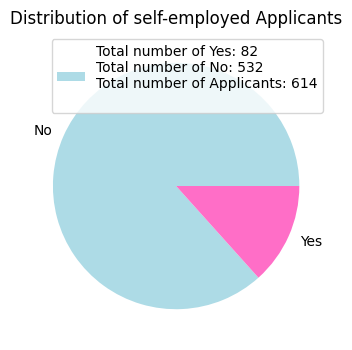

In [6]:
#Pie chart for univariant analysis
self_employed_totals = raw_data_df['Self_Employed'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(self_employed_totals,labels = self_employed_totals.index, colors=['#ADDBE6', '#FF6EC7']) 
plt.title('Distribution of self-employed Applicants')
plt.legend(labels=[f"Total number of Yes: {self_employed_totals['Yes']}\n"
                   f"Total number of No: {self_employed_totals['No']}\n"
                   f"Total number of Applicants: {len(raw_data_df)}\n"],
                    loc='upper right')
plt.show()

There are 614 Applicants, 82 of those are self-employed, thus 86.67% of loan applicants are employed. thus it is expected that majority of loan applicants will be employed.

### Bivariant Analysis


In [7]:
#Group the self employed feature based on the loan status

selfEmp_loan_df = pd.DataFrame(
    raw_data_df[['Self_Employed','Loan_Status']].groupby(['Loan_Status'])
    .value_counts().reset_index()
).rename(columns={0:'count'})
#print(selfEmp_loan_df.columns)

In [8]:
# Plot self-Employed feature vs target Loan_Status

fig = px.bar(
    data_frame=selfEmp_loan_df, 
    x='Self_Employed', 
    y='count', 
    facet_col='Loan_Status', 
    color=selfEmp_loan_df['Loan_Status']#.astype(str) 
)

fig.update_layout(xaxis_title='Self Employed', yaxis_title='Count')
fig.show()

In [9]:
#print(selfEmp_loan_df.head())

emp_yes = selfEmp_loan_df.loc[(selfEmp_loan_df['Loan_Status'] == 'Y')
                             & (selfEmp_loan_df['Self_Employed'] == 'No'), 'count'].values[0]
self_emp_yes = selfEmp_loan_df.loc[(selfEmp_loan_df['Loan_Status'] == 'Y')
                             & (selfEmp_loan_df['Self_Employed'] == 'Yes'), 'count'].values[0]

emp_no = selfEmp_loan_df.loc[(selfEmp_loan_df['Loan_Status'] == 'N')
                             & (selfEmp_loan_df['Self_Employed'] == 'No'), 'count'].values[0]
self_emp_no = selfEmp_loan_df.loc[(selfEmp_loan_df['Loan_Status'] == 'N')
                             & (selfEmp_loan_df['Self_Employed'] == 'Yes'), 'count'].values[0]
print('Successful Loan Application status:')
print(f"\t Employed Applicants: {emp_yes}")
print(f"\t self-employed Applicants: {self_emp_yes}\n")

print('Unsuccessful Loan Application status:')
print(f"\t Employed Applicants: {emp_no}")
print(f"\t self-employed Applicants: {self_emp_no}")



Successful Loan Application status:
	 Employed Applicants: 366
	 self-employed Applicants: 56

Unsuccessful Loan Application status:
	 Employed Applicants: 166
	 self-employed Applicants: 26


key Takeaways:
- Employed applicants are more likely to qualify to apply for a loan than self-employed applicants.
- only 9.21% of self-employed applicants qualify to apply for a loan.
- There are more employed applicants seeking a loan than self-employed applicants.